['p1', 'tr', '1', 'tf', '5', 'duty', '10']
['p2', 'tr', '2', 'tf', '6', 'duty', '11']
['p3', 'tr', '3', 'tf', '7', 'duty', '12']
['p4', 'tr', '4', 'tf', '8', 'duty', '13']


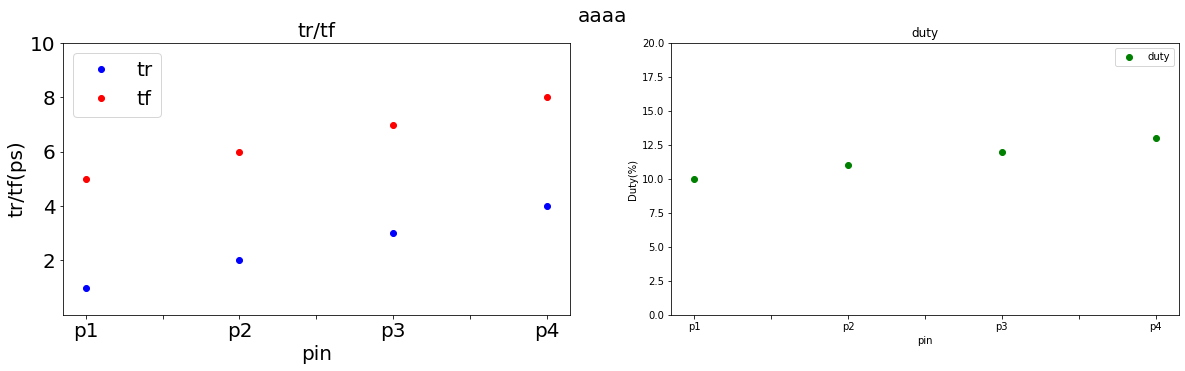

In [145]:
import csv
from collections import OrderedDict

import matplotlib.pyplot as plt

import pandas as pd

index = []
tr = []
tf = []
duty = []

with open("data.csv") as f:
    for row in csv.reader(f):
        index.append(row[0])
        tr.append(int(row[2]))
        tf.append(int(row[4]))
        duty.append(int(row[6]))
        print(row)

data = OrderedDict(tr=tr, tf=tf, duty=duty)

df = pd.DataFrame(data, index=index)
df_trtf = df[["tr", "tf"]]
df_duty = df["duty"]

fig = plt.figure(figsize=(20, 5))  # subplotを入れる図の全体を作成する

axes1 = fig.add_subplot(1, 2, 1)  # subplot axes1は1行2列の1に置く
axes2 = fig.add_subplot(1, 2, 2)  # subplot axes2は1行2列の2に置く

df_trtf.plot(
    ax=axes1,
    kind="line",
    style=["bo", "ro"],
    ylim=[0, 10],
    legend=True,
    fontsize=20,
)
axes1.set_xlabel("pin", fontsize=20)
axes1.set_ylabel("tr/tf(ps)", fontsize=20)
axes1.set_yticks([2, 4, 6, 8, 10])
axes1.legend(fontsize=20)
axes1.set_title("tr/tf", fontsize=20)

df_duty.plot(ax=axes2, title="duty", style=["go"], ylim=[0, 20], legend=True)
axes2.set_xlabel("pin")
axes2.set_ylabel("Duty(%)")

# fig.tight_layout()
plt.suptitle("aaaa", fontsize=20)
plt.savefig("test.png")